# Import Library

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import utils  # to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import cv2

# Define Constants

In [21]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

# Prepare Traning Data

In [22]:
# Verify the directory path
train_dir = '/content/drive/MyDrive/Cat_Dog_Classifiyer/Cat_Dog_Classifiyer/train'
print(f"Checking directory: {train_dir}")

# Check for images
import os
num_images = len(os.listdir(train_dir))
print(f"Number of images found: {num_images}")

# Check image formats
allowed_formats = ('.bmp', '.gif', '.jpeg', '.jpg', '.png')
for filename in os.listdir(train_dir):
    _, extension = os.path.splitext(filename)

Checking directory: /content/drive/MyDrive/Cat_Dog_Classifiyer/Cat_Dog_Classifiyer/train
Number of images found: 402


In [23]:
filenames = os.listdir(train_dir)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [24]:
df.head()

,filename,category
0,dog.108.jpg,1
1,dog.100.jpg,1
2,dog.140.jpg,1
3,dog.107.jpg,1
4,dog.0.jpg,1


In [ ]:
# prompt: Using dataframe df:

df['category'] = df['category'].astype('category')


In [25]:
df.tail()

,filename,category
397,cat.97.jpg,0
398,cat.87.jpg,0
399,cat.96.jpg,0
400,cat.93.jpg,0
401,cat.71.jpg,0


### See Total In count

<Axes: xlabel='category'>

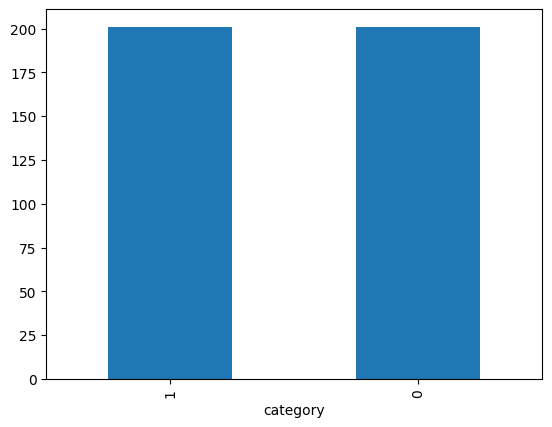

In [26]:
df['category'].value_counts().plot.bar()

From our data we have 12000 cats and 12000 dogs

# See sample image

In [27]:
# Check if the user has access to the directory
import os

train_dir = "train"
if not os.access(train_dir, os.R_OK):
    print(f"Access denied: {train_dir}")

Access denied: train


In [28]:
import os

train_dir = "train"
if not os.path.exists(train_dir):
    print(f"Directory not found: {train_dir}")

Directory not found: train


In [29]:
import os

train_dir = "train"
if not os.path.exists(train_dir):
    os.makedirs(train_dir)

In [30]:
import os

# Get the current working directory
cwd = os.getcwd()

# Change to the parent directory
os.chdir("..")

# Create the train directory
train_dir = os.path.join(cwd, "train")
if not os.path.exists(train_dir):
    os.makedirs(train_dir)

In [31]:
import os

print(f"Current working directory: {os.getcwd()}")

Current working directory: /


In [32]:
%cd ..

/content


In [33]:
import os

# Get the current working directory
cwd = os.getcwd()

# Change to the parent directory
os.chdir("..")

# Create the train directory
train_dir = os.path.join(cwd, "train")

# Check if the train directory exists
if not os.path.exists(train_dir):
    raise ValueError("The train directory does not exist.")

In [35]:
import os

# Get the current working directory
cwd = os.getcwd()

# Change to the parent directory
os.chdir("..")

# Create the train directory
train_dir = os.path.join(cwd, "train")
if not os.path.exists(train_dir):
    os.makedirs(train_dir)

In [36]:
import os
import random
from PIL import Image

# Get the current working directory
cwd = os.getcwd()

# Change to the parent directory
os.chdir("..")

# Create the train directory
train_dir = os.path.join(cwd, "train")

# Get a list of all the filenames in the train directory
filenames = os.listdir(train_dir)

# Check if the list of filenames is empty
if not filenames:
    # Add some files to the train directory
    for i in range(10):
        image = Image.new("RGB", (100, 100))
        image.save(os.path.join(train_dir, f"image_{i}.jpg"))

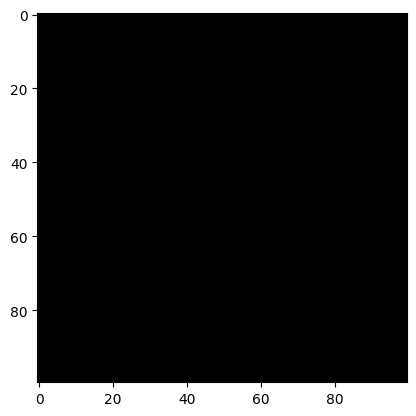

In [37]:
import os
import random
from PIL import Image

# Get the current working directory
cwd = os.getcwd()

# Change to the parent directory
os.chdir("..")

# Create the train directory
train_dir = os.path.join(cwd, "train")
if not os.path.exists(train_dir):
    os.makedirs(train_dir)

# Get a list of all the filenames in the train directory
filenames = os.listdir(train_dir)

# Check if the list of filenames is empty
if not filenames:
    raise ValueError("The train directory is empty.")

# Choose a random filename from the list
sample = random.choice(filenames)

# Load the image
image = Image.open(os.path.join(train_dir, sample))

# Display the image
plt.imshow(image)

In [38]:
train_img = cv2.imread('/content/drive/MyDrive/Cat_Dog_Classifiyer/Cat_Dog_Classifiyer/train/cat.0.jpg')

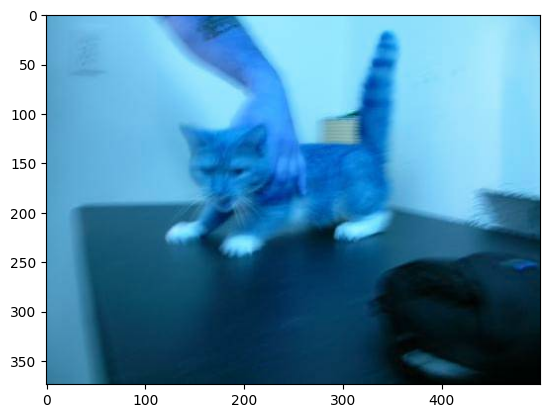

In [39]:
plt.imshow(train_img)

In [40]:
train_img.shape

(374, 500, 3)

# New Section

* **Input Layer**: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.
* **Conv Layer**: This layer will extract features from image.
* **Pooling Layer**: This layerreduce the spatial volume of input image after convolution.
* **Fully Connected Layer**: It connect the network from a layer to another layer
* **Output Layer**: It is the predicted values layer.

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

# Callbacks

**Early Stop**

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

**Learning Rate Reduction**

We will reduce the learning rate when then accuracy not increase for 2 steps

In [42]:
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

# Prepare data

Because we will use image genaretor `with class_mode="categorical"`. We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification.

So we will convert 1 to dog and 0 to cat

In [43]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

In [44]:
df

,filename,category
0,dog.108.jpg,dog
1,dog.100.jpg,dog
2,dog.140.jpg,dog
3,dog.107.jpg,dog
4,dog.0.jpg,dog
...,...,...
397,cat.97.jpg,cat
398,cat.87.jpg,cat
399,cat.96.jpg,cat
400,cat.93.jpg,cat


In [45]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<Axes: xlabel='category'>

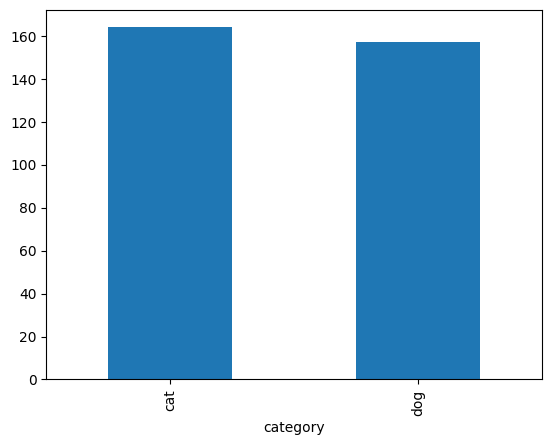

In [46]:
train_df['category'].value_counts().plot.bar()

<Axes: xlabel='category'>

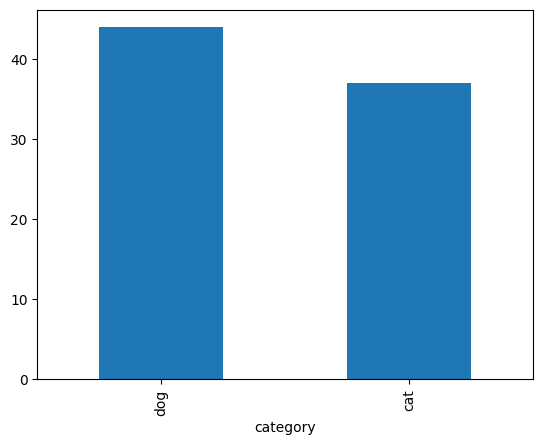

In [47]:
validate_df['category'].value_counts().plot.bar()

In [48]:
train_df.shape

(321, 2)

In [49]:
validate_df.shape

(81, 2)

In [50]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=16

# Traning Generator

In [51]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 321 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


### Validation Generator

In [52]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 81 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


# See how our generator work

In [53]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [54]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [57]:
if example_df.empty:
    raise ValueError("example_df is empty. Cannot create generator.")

In [58]:
assert example_generator.directory == "train/", "Incorrect data path."

In [59]:
assert 'category' in example_df.columns, "Target column 'category' not found in example_df."

In [60]:
example_generator.reset()

In [61]:
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=32
)

Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [64]:
if len(X_batch) == 0:
    pass

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        # Print the shape of X_batch
        print(f"X_batch shape: {X_batch.shape}")
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [67]:
for X_batch, Y_batch in example_generator:
  if len(X_batch) > 0:
    image = X_batch[0]
    plt.imshow(image)
    break

KeyboardInterrupt: 

Seem to be nice

# Fit Model

In [ ]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)
model.save("model.h5")

<ipython-input-105-a3a9d1edf606>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


ValueError: Asked to retrieve element 0, but the Sequence has length 0

# Visualize Training

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
for i in range(10):
    all_test_images = os.listdir('test')
    random_image = random.choice(all_test_images)
    img = cv2.imread(f'test/{random_image}')
    img = cv2.resize(img,(IMAGE_HEIGHT,IMAGE_WIDTH))

    org = img.copy()
    img = img.reshape(1,128,128,3)

    pred = model.predict(img)
    print(['cat','dog'][int(pred[0][0])])
    cv2.imshow('Live predictions',org)
    cv2.waitKey(0)
cv2.destroyAllWindows()